In this notebook we'll se how to use decision trees for classification. We'll be using decision tree to predict whether a person will have a stroke or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

df=pd.read_csv('/kaggle/input/stoke-prediction-dataset/train.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1137 non-null   int64  
 1   gender             1137 non-null   object 
 2   age                1137 non-null   object 
 3   hypertension       1137 non-null   int64  
 4   heart_disease      1137 non-null   int64  
 5   ever_married       1137 non-null   object 
 6   work_type          1137 non-null   object 
 7   Residence_type     1137 non-null   object 
 8   avg_glucose_level  1137 non-null   float64
 9   bmi                1085 non-null   float64
 10  smoking_status     1137 non-null   object 
 11  stroke             1137 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 106.7+ KB


In [3]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
810,6827,Male,30,0,0,Yes,Private,Urban,96.02,29.8,never smoked,0
787,56679,Male,19,0,0,No,Private,Rural,142.57,22.8,Unknown,0
957,6278,Male,5,0,0,No,children,Urban,97.46,17.6,Unknown,0
1037,55599,Female,9,0,0,No,children,Rural,69.87,18.0,Unknown,0
98,65413,Female,64,0,0,Yes,Private,Urban,55.64,43.4,never smoked,0


In [4]:
df.isna().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

In [5]:
mean = df['bmi'].mean()
df.fillna(mean, inplace=True)

In [6]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df=df.drop('id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1137 non-null   object 
 1   age                1137 non-null   object 
 2   hypertension       1137 non-null   int64  
 3   heart_disease      1137 non-null   int64  
 4   ever_married       1137 non-null   object 
 5   work_type          1137 non-null   object 
 6   Residence_type     1137 non-null   object 
 7   avg_glucose_level  1137 non-null   float64
 8   bmi                1137 non-null   float64
 9   smoking_status     1137 non-null   object 
 10  stroke             1137 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 97.8+ KB


In [8]:
numerical_vars = df.columns[df.dtypes != "object"]
categorical_vars = df.columns[df.dtypes == "object"]

print(numerical_vars);
print(categorical_vars);

Index(['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke'], dtype='object')
Index(['gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[categorical_vars] = df[categorical_vars].apply(lambda col: le.fit_transform(col))
df[categorical_vars].sample(5)

,gender,age,ever_married,work_type,Residence_type,smoking_status
807,1,14,0,2,1,2
186,0,38,0,2,1,2
791,0,5,0,4,0,2
1,0,6,0,4,0,0
1074,0,36,1,3,1,1


In [10]:
from sklearn.model_selection import train_test_split
x = df.drop('stroke', axis=1)
print(x)
y = df["stroke"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

      gender  age  hypertension  heart_disease  ever_married  work_type  \
0          0   26             0              0             0          0   
1          0    6             0              0             0          4   
2          1   11             0              0             0          2   
3          0   63             0              0             1          2   
4          1   35             0              0             0          4   
...      ...  ...           ...            ...           ...        ...   
1132       0    2             0              0             0          4   
1133       1   57             0              0             0          4   
1134       1   81             0              0             1          2   
1135       0   81             1              0             1          2   
1136       0   54             1              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  0              7

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc_gini=DecisionTreeClassifier(criterion="gini", min_samples_leaf=3, random_state=42)
dtc_gini.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=3, random_state=42)

In [13]:
dtc_entropy=DecisionTreeClassifier(criterion="entropy", min_samples_leaf=3, random_state=42)
dtc_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3, random_state=42)

In [14]:
y_pred_gini=dtc_gini.predict(x_test)
y_pred_entropy=dtc_entropy.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.65%


In [16]:
accuracy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.26%


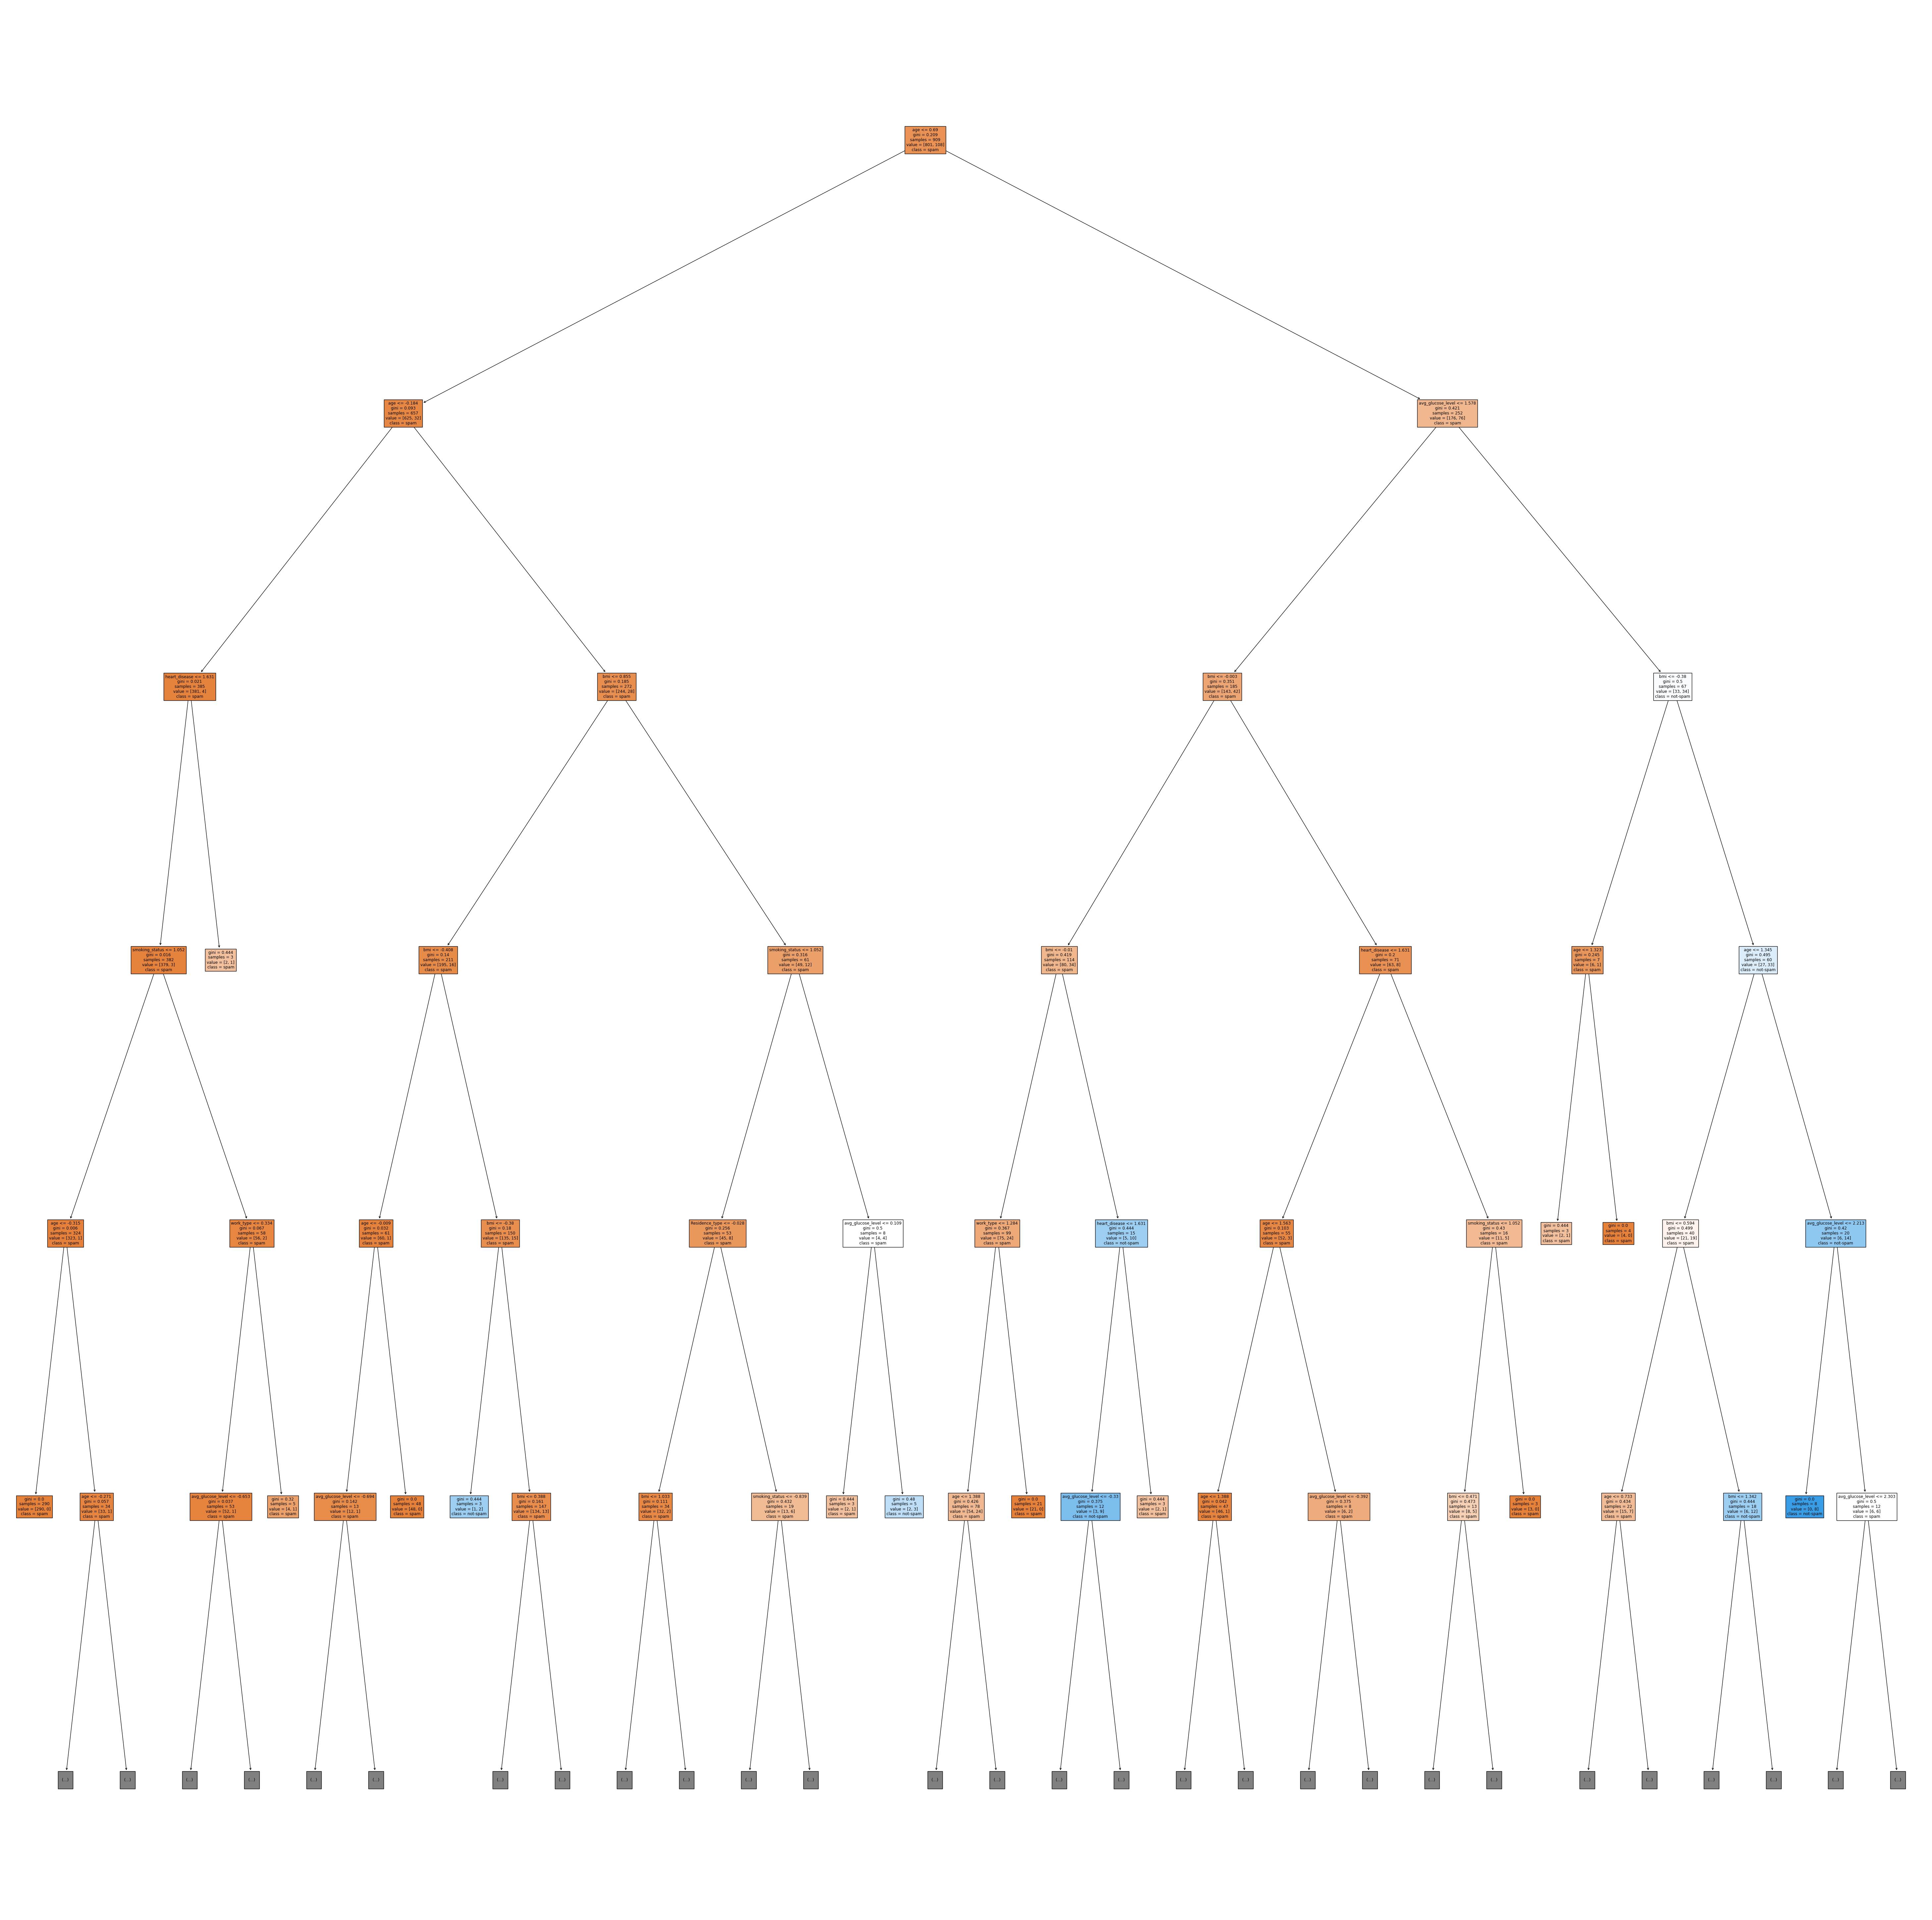

In [17]:
from sklearn.tree import plot_tree
feature_names=x.columns.values.tolist()
fig = plt.figure(figsize=(75,75))
_ = plot_tree(dtc_gini, feature_names=feature_names,  
                   class_names=['spam', 'not-spam'],
                   max_depth=5, filled=True)
fig.savefig("decistion_tree_gini.png")

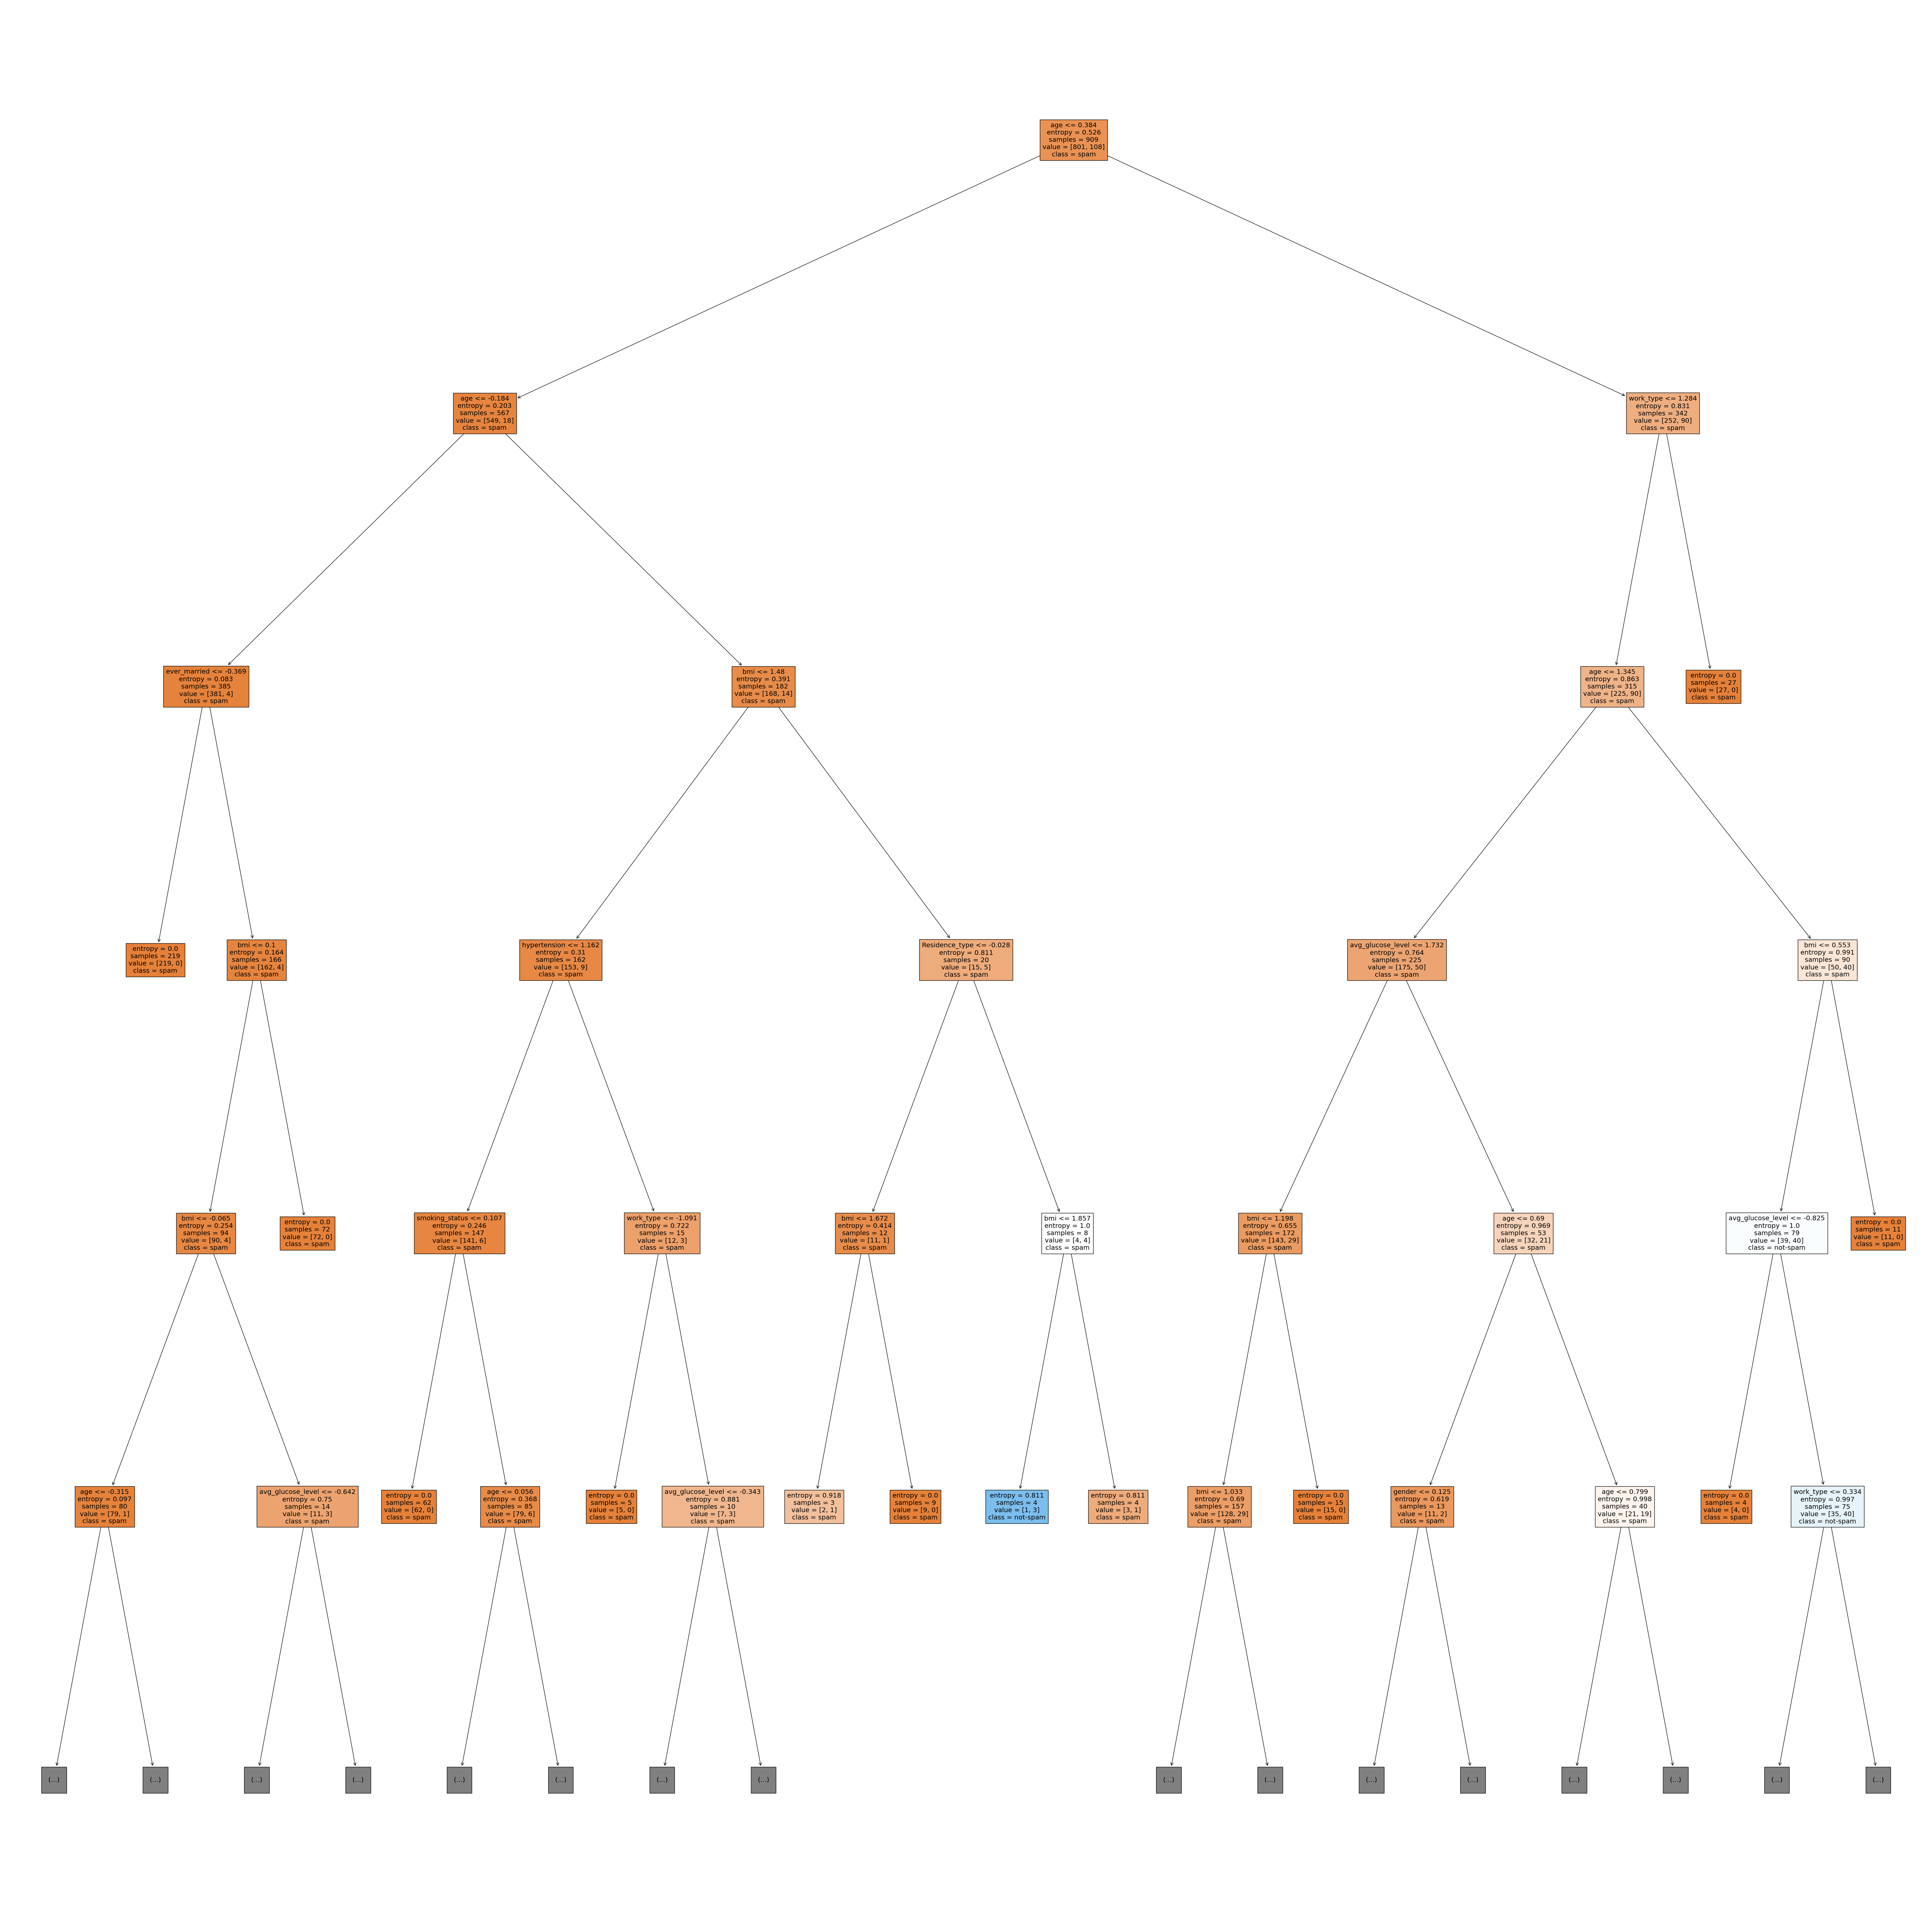

In [18]:
from sklearn.tree import plot_tree
feature_names=x.columns.values.tolist()
fig = plt.figure(figsize=(75,75))
_ = plot_tree(dtc_entropy, feature_names=feature_names,  
                   class_names=['spam', 'not-spam'],
                   max_depth=5, filled=True)
fig.savefig("decistion_tree_entropy.png")